In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('Data/Train/Train.csv')
test = pd.read_csv('Data/test_l0Auv8Q.csv')
sub = pd.read_csv('Data/sample_submmission.csv')
pp = pd.read_csv('Data/Train/Patient_Profile.csv')
fh = pd.read_csv('Data/Train/First_Health_Camp_Attended.csv')
sh = pd.read_csv('Data/Train/Second_Health_Camp_Attended.csv')
th = pd.read_csv('Data/Train/Third_Health_Camp_Attended.csv')
hc = pd.read_csv('Data/Train/Health_Camp_Detail.csv')

In [3]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


In [4]:
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0


In [5]:
pp.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3,87,46,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1,75,47,02-Nov-02,D,Education
4,521075,0,0,0,0,3,None,80,24-Nov-02,H,Others


In [6]:
fh.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN


In [7]:
sh.head()

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712


In [8]:
th.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,510954,6528,2,2


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75278 entries, 0 to 75277
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient_ID         75278 non-null  int64 
 1   Health_Camp_ID     75278 non-null  int64 
 2   Registration_Date  74944 non-null  object
 3   Var1               75278 non-null  int64 
 4   Var2               75278 non-null  int64 
 5   Var3               75278 non-null  int64 
 6   Var4               75278 non-null  int64 
 7   Var5               75278 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 4.6+ MB


In [10]:
# unique patients in train data
train.Patient_ID.nunique()

29828

In [11]:
# unique patients in test data
test.Patient_ID.nunique()

15324

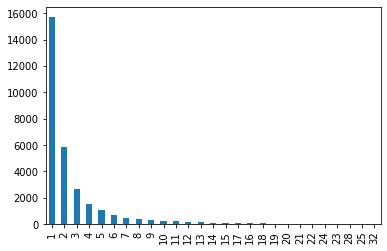

In [12]:
# number of registrations per patient
train.groupby('Patient_ID').size().reset_index(drop=True).value_counts().plot(kind='bar')

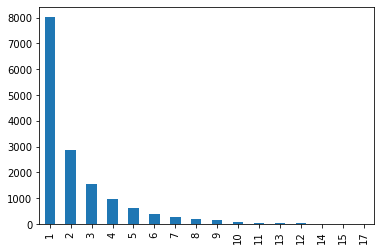

In [13]:
test.groupby('Patient_ID').size().reset_index(drop=True).value_counts().plot(kind='bar')

In [14]:
train.isnull().sum()

Patient_ID             0
Health_Camp_ID         0
Registration_Date    334
Var1                   0
Var2                   0
Var3                   0
Var4                   0
Var5                   0
dtype: int64

In [15]:
test.isnull().sum()

Patient_ID           0
Health_Camp_ID       0
Registration_Date    0
Var1                 0
Var2                 0
Var3                 0
Var4                 0
Var5                 0
dtype: int64

In [16]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


In [17]:
train['Registration_Date'] = pd.to_datetime(train['Registration_Date'])
train.sort_values(by=['Patient_ID', 'Registration_Date'], inplace=True)
train.reset_index(drop=True,inplace=True)    

In [18]:
train['registration_day'] = train['Registration_Date'].dt.day
train['registration_month'] = train['Registration_Date'].dt.month
train['registration_year'] = train['Registration_Date'].dt.year
train['registration_weekday'] = train['Registration_Date'].dt.weekday

In [19]:
train['Unique_Patient_per_HealthCamp'] = train.groupby('Health_Camp_ID')['Patient_ID'].transform('nunique')
train['Unique_Health_Camp_per_patient'] = train.groupby('Patient_ID')['Health_Camp_ID'].transform('nunique')
train['Unique_year_per_patient'] = train.groupby('Patient_ID')['registration_year'].transform('nunique')
train['Unique_months_per_patient'] = train.groupby('Patient_ID')['registration_month'].transform('nunique')
train['Unique_day_per_patient'] = train.groupby('Patient_ID')['registration_day'].transform('nunique')
train['unique_weekday_per_patient'] = train.groupby('Patient_ID')['registration_weekday'].transform('nunique')

In [20]:
train['days_since_last_registration'] = train.groupby('Patient_ID')['Registration_Date'].diff().dt.days
train['days_since_next_registration'] = train.groupby('Patient_ID')['Registration_Date'].diff(-1).abs().dt.days

In [21]:
pp.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3,87,46,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1,75,47,02-Nov-02,D,Education
4,521075,0,0,0,0,3,None,80,24-Nov-02,H,Others


In [22]:
pp[['Income', 'Education_Score', 'Age']] = pp[['Income', 'Education_Score', 'Age']].apply(lambda x: x.str.replace('None', 'NaN').astype('float'))

In [23]:
pp['online_activity_score'] = pp['Online_Follower']+pp['LinkedIn_Shared']+pp['Twitter_Shared']+pp['Facebook_Shared']
pp.drop(['Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared', 'Facebook_Shared'], axis=1, inplace=True)

In [24]:
pp['First_Interaction'] = pd.to_datetime(pp['First_Interaction'])
# pp.sort_values(by=['Patient_ID', 'First_Interaction'], inplace=True)

pp['interaction_day'] = pp['First_Interaction'].dt.day
pp['interaction_month'] = pp['First_Interaction'].dt.month
pp['interaction_year'] = pp['First_Interaction'].dt.year
pp['interaction_weekday'] = pp['First_Interaction'].apply(lambda x: x.weekday())

pp['interaction_year_per_patient'] = pp.groupby('Patient_ID')['interaction_year'].transform('nunique')
pp['interaction_month_per_patient'] = pp.groupby('Patient_ID')['interaction_month'].transform('nunique')
pp['interaction_day_per_patient'] = pp.groupby('Patient_ID')['interaction_day'].transform('nunique')
pp['interaction_weekday_per_patient'] = pp.groupby('Patient_ID')['interaction_weekday'].transform('nunique')

In [25]:
fh.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN


In [26]:
# fh['donation_per_patient'] = fh.groupby('Patient_ID')['Donation'].transform('sum')
fh.drop(['Unnamed: 4', 'Donation'], axis=1, inplace=True)

In [27]:
sh.head()

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712


In [28]:
th.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,510954,6528,2,2


In [29]:
# th['total_stalls_per_patient'] = th.groupby('Patient_ID')['Number_of_stall_visited'].transform('sum')

In [30]:
hc.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2
2,6544,03-Nov-03,15-Nov-03,First,F,1
3,6585,22-Nov-03,05-Dec-03,First,E,2
4,6561,30-Nov-03,18-Dec-03,First,E,1


In [31]:
hc['Camp_Start_Date'] = pd.to_datetime(hc['Camp_Start_Date'])
hc['Camp_End_Date'] = pd.to_datetime(hc['Camp_End_Date'])

In [32]:
hc['Camp_Duration'] = (hc['Camp_End_Date'] - hc['Camp_Start_Date']).dt.days

hc['camp_start_day'] = hc['Camp_Start_Date'].dt.day
hc['camp_start_month'] = hc['Camp_Start_Date'].dt.month
hc['camp_start_year'] = hc['Camp_Start_Date'].dt.year
hc['camp_start_weekday'] = hc['Camp_Start_Date'].dt.weekday

hc['camp_end_day'] = hc['Camp_End_Date'].dt.day
hc['camp_end_month'] = hc['Camp_End_Date'].dt.month
hc['camp_end_year'] = hc['Camp_End_Date'].dt.year
hc['camp_end_weekday'] = hc['Camp_End_Date'].dt.weekday

In [33]:
hc['Category1'] = hc['Category1'].map({'First': 1, 'Second': 2, 'Third': 3})
hc['Category2'] = pd.factorize(hc['Category2'])[0]

In [34]:
train = train.merge(pp, left_on='Patient_ID', right_on='Patient_ID', how='left')
train = train.merge(hc, left_on='Health_Camp_ID', right_on='Health_Camp_ID', how='left')
train = train.merge(fh, left_on=['Patient_ID', 'Health_Camp_ID'], right_on=['Patient_ID', 'Health_Camp_ID'], how='left')
train = train.merge(sh, left_on=['Patient_ID', 'Health_Camp_ID'], right_on=['Patient_ID', 'Health_Camp_ID'], how='left')
train = train.merge(th, left_on=['Patient_ID', 'Health_Camp_ID'], right_on=['Patient_ID', 'Health_Camp_ID'], how='left')

In [35]:
train['outcome'] = train.apply(lambda x: 1 if (x['Health_Score'] > 0 or x['Health Score'] > 0 or x['Number_of_stall_visited']  > 0) else 0, axis=1)

In [36]:
train['Unique_camp_year_per_patient']=train.groupby(['Patient_ID'])['camp_start_year'].transform('nunique')
train['Unique_camp_months_per_patient']=train.groupby(['Patient_ID'])['camp_start_month'].transform('nunique')
train['Unique_camp_day_per_patient']=train.groupby(['Patient_ID'])['camp_start_day'].transform('nunique')

In [37]:
test['Registration_Date'] = pd.to_datetime(test['Registration_Date'])
test.sort_values(by=['Patient_ID', 'Registration_Date'], inplace=True)
test.reset_index(drop=True,inplace=True)    

test['registration_day'] = test['Registration_Date'].dt.day
test['registration_month'] = test['Registration_Date'].dt.month
test['registration_year'] = test['Registration_Date'].dt.year
test['registration_weekday'] = test['Registration_Date'].dt.weekday

test['Unique_Patient_per_HealthCamp'] = test.groupby('Health_Camp_ID')['Patient_ID'].transform('nunique')
test['Unique_Health_Camp_per_patient'] = test.groupby('Patient_ID')['Health_Camp_ID'].transform('nunique')
test['Unique_year_per_patient'] = test.groupby('Patient_ID')['registration_year'].transform('nunique')
test['Unique_months_per_patient'] = test.groupby('Patient_ID')['registration_month'].transform('nunique')
test['Unique_day_per_patient'] = test.groupby('Patient_ID')['registration_day'].transform('nunique')
test['unique_weekday_per_patient'] = test.groupby('Patient_ID')['registration_weekday'].transform('nunique')

test['days_since_last_registration'] = test.groupby('Patient_ID')['Registration_Date'].diff().dt.days
test['days_since_next_registration'] = test.groupby('Patient_ID')['Registration_Date'].diff(-1).abs().dt.days

test = test.merge(pp, left_on='Patient_ID', right_on='Patient_ID', how='left')
test = test.merge(hc, left_on='Health_Camp_ID', right_on='Health_Camp_ID', how='left')
test = test.merge(fh, left_on=['Patient_ID', 'Health_Camp_ID'], right_on=['Patient_ID', 'Health_Camp_ID'], how='left')
test = test.merge(sh, left_on=['Patient_ID', 'Health_Camp_ID'], right_on=['Patient_ID', 'Health_Camp_ID'], how='left')
test = test.merge(th, left_on=['Patient_ID', 'Health_Camp_ID'], right_on=['Patient_ID', 'Health_Camp_ID'], how='left')


test['Unique_camp_year_per_patient']=test.groupby(['Patient_ID'])['camp_start_year'].transform('nunique')
test['Unique_camp_months_per_patient']=test.groupby(['Patient_ID'])['camp_start_month'].transform('nunique')
test['Unique_camp_day_per_patient']=test.groupby(['Patient_ID'])['camp_start_day'].transform('nunique')

In [38]:
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,registration_day,registration_month,registration_year,registration_weekday,Unique_Patient_per_HealthCamp,Unique_Health_Camp_per_patient,Unique_year_per_patient,Unique_months_per_patient,Unique_day_per_patient,unique_weekday_per_patient,days_since_last_registration,days_since_next_registration,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,online_activity_score,interaction_day,interaction_month,interaction_year,interaction_weekday,interaction_year_per_patient,interaction_month_per_patient,interaction_day_per_patient,interaction_weekday_per_patient,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Camp_Duration,camp_start_day,camp_start_month,camp_start_year,camp_start_weekday,camp_end_day,camp_end_month,camp_end_year,camp_end_weekday,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Unique_camp_year_per_patient,Unique_camp_months_per_patient,Unique_camp_day_per_patient
0,485678,6551,2006-11-13,0,0,0,0,0,13,11,2006,0,2180,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,2006-11-13,A,NaN,0,13,11,2006,0,1,1,1,1,2006-11-13,2006-11-18,2,4,2,5,13,11,2006,0,18,11,2006,5,NaN,NaN,NaN,NaN,1,1,1
1,485683,6584,2006-05-29,0,0,0,0,0,29,5,2006,0,3041,5,2,2,2,2,NaN,0.0,0.0,NaN,71.0,2006-05-19,NaN,NaN,0,19,5,2006,4,1,1,1,1,2006-08-04,2006-08-09,2,6,2,5,4,8,2006,4,9,8,2006,2,NaN,NaN,NaN,NaN,2,4,5
2,485683,6582,2006-05-29,0,0,0,0,0,29,5,2006,0,2763,5,2,2,2,2,0.0,0.0,0.0,NaN,71.0,2006-05-19,NaN,NaN,0,19,5,2006,4,1,1,1,1,2006-04-06,2007-11-07,1,2,2,580,6,4,2006,3,7,11,2007,2,NaN,NaN,NaN,NaN,2,4,5
3,485683,6548,2006-05-29,0,0,0,0,0,29,5,2006,0,3020,5,2,2,2,2,0.0,2.0,0.0,NaN,71.0,2006-05-19,NaN,NaN,0,19,5,2006,4,1,1,1,1,2006-06-13,2006-08-18,3,5,2,66,13,6,2006,1,18,8,2006,4,NaN,NaN,NaN,NaN,2,4,5
4,485683,6583,2006-05-31,0,0,0,0,0,31,5,2006,2,3026,5,2,2,2,2,2.0,245.0,0.0,NaN,71.0,2006-05-19,NaN,NaN,0,19,5,2006,4,1,1,1,1,2006-08-02,2006-08-05,2,6,2,3,2,8,2006,2,5,8,2006,5,NaN,NaN,NaN,NaN,2,4,5


In [39]:
# Target Encoder
from category_encoders.target_encoder import TargetEncoder

cat_fetaures=['City_Type', 'Employer_Category']
te = TargetEncoder()
te.fit(train[cat_fetaures],train['outcome'])
train[cat_fetaures] = te.transform(train[cat_fetaures])
test[cat_fetaures] = te.transform(test[cat_fetaures])

In [40]:
# Encoding the columns (LabelEncoder)
from sklearn.preprocessing import LabelEncoder

cat_columns = []
for col in train.columns:
    if train[col].dtype == 'object':
        print(col)
        cat_columns.append(col)
        enc = LabelEncoder()
        full_list = list(train[col].values) + list(test[col].values)
        enc.fit(full_list)
        train[col] = enc.transform(list(train[col].values))
        test[col]  = enc.transform(list(test[col].values))

# Aggregate Numeric Fields 

### Using Patient_ID

In [41]:
def agg_numeric(df, parent_feature, prefix, exclude_numeric_columns=[]):
    """
    Groups and aggregates the numeric values in a child dataframe
    by the parent variable.
    
    Parameters
    --------
        df (dataframe): 
            the child dataframe to calculate the statistics on
        parent_feature (string): 
            the parent variable used for grouping and aggregating
        prefix (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated by the `parent_feature` for 
            all numeric columns. Each observation of the parent variable will have 
            one row in the dataframe with the parent variable as the index. 
            The columns are also renamed using the `prefix`. Columns with all duplicate
            values are removed. 
    
    """
    
            
    # Only want the numeric variables
    parent_ids = df[parent_feature].copy()
    numeric_df = df.select_dtypes('number').drop(columns=exclude_numeric_columns).copy()
    numeric_df[parent_feature] = parent_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(parent_feature).agg(['count', 'mean', 'max', 'min', 'sum'])

    # Need to create new column names
    columns = []

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        if var != parent_feature:
            # Iterate through the stat names
            for stat in agg.columns.levels[1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (prefix, var, stat))
    
    agg.columns = columns
    
    # Remove the columns with all redundant values
    _, idx = np.unique(agg, axis = 1, return_index=True)
    agg = agg.iloc[:, idx]
    
    return agg


In [42]:
train['train_or_test']='train'
test['train_or_test']='test'
df = pd.concat([train, test])

In [43]:
train.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5', 'registration_day', 'registration_month',
       'registration_year', 'registration_weekday',
       'Unique_Patient_per_HealthCamp', 'Unique_Health_Camp_per_patient',
       'Unique_year_per_patient', 'Unique_months_per_patient',
       'Unique_day_per_patient', 'unique_weekday_per_patient',
       'days_since_last_registration', 'days_since_next_registration',
       'Income', 'Education_Score', 'Age', 'First_Interaction', 'City_Type',
       'Employer_Category', 'online_activity_score', 'interaction_day',
       'interaction_month', 'interaction_year', 'interaction_weekday',
       'interaction_year_per_patient', 'interaction_month_per_patient',
       'interaction_day_per_patient', 'interaction_weekday_per_patient',
       'Camp_Start_Date', 'Camp_End_Date', 'Category1', 'Category2',
       'Category3', 'Camp_Duration', 'camp_start_day', 'camp_start_month',
       'camp_start_

In [44]:
PID_aggregate = agg_numeric(df, 'Patient_ID', 'agg', exclude_numeric_columns=['Patient_ID', 'Health_Camp_ID', 'Health_Score', 'Health Score', 'Last_Stall_Visited_Number', 'Number_of_stall_visited', 'outcome'])
print('PID aggregate shape: ', PID_aggregate.shape)
df=df.merge(PID_aggregate, on ='Patient_ID', how = 'left')

PID aggregate shape:  (36692, 162)


In [45]:
df['Patient_Registered_before_days']=(pd.to_datetime(df['Camp_Start_Date'])-pd.to_datetime(df['Registration_Date'])).dt.days

In [46]:
# df.fillna(-99, inplace=True)

In [47]:
df.head(10)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,registration_day,registration_month,registration_year,registration_weekday,Unique_Patient_per_HealthCamp,Unique_Health_Camp_per_patient,Unique_year_per_patient,Unique_months_per_patient,Unique_day_per_patient,unique_weekday_per_patient,days_since_last_registration,days_since_next_registration,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,online_activity_score,interaction_day,interaction_month,interaction_year,interaction_weekday,interaction_year_per_patient,interaction_month_per_patient,interaction_day_per_patient,interaction_weekday_per_patient,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Camp_Duration,camp_start_day,camp_start_month,camp_start_year,camp_start_weekday,camp_end_day,camp_end_month,camp_end_year,camp_end_weekday,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,outcome,Unique_camp_year_per_patient,Unique_camp_months_per_patient,Unique_camp_day_per_patient,train_or_test,agg_Var3_min,agg_Var3_mean,agg_Var3_max,agg_Var3_sum,agg_Var4_min,agg_Var2_min,agg_Var5_min,agg_Var1_min,agg_Var4_mean,agg_Var2_mean,agg_Var5_mean,agg_Var4_max,agg_Var4_sum,agg_Var1_mean,agg_Var2_max,agg_Var1_max,agg_Var5_max,agg_Var2_sum,agg_Var5_sum,agg_Var1_sum,agg_Education_Score_count,agg_Income_sum,agg_Education_Score_sum,agg_registration_weekday_min,agg_online_activity_score_mean,agg_online_activity_score_sum,agg_Income_count,agg_Age_count,agg_Age_sum,agg_days_since_last_registration_count,agg_registration_weekday_mean,agg_camp_start_weekday_min,agg_registration_weekday_max,agg_registration_weekday_sum,agg_camp_start_weekday_mean,agg_camp_start_weekday_max,agg_interaction_weekday_mean,agg_camp_start_weekday_sum,agg_interaction_weekday_sum,agg_days_since_last_registration_sum,agg_Employer_Category_mean,agg_Employer_Category_max,agg_Employer_Category_sum,agg_City_Type_mean,agg_City_Type_max,agg_City_Type_sum,agg_interaction_year_per_patient_mean,agg_Unique_year_per_patient_min,agg_Unique_year_per_patient_mean,agg_Unique_year_per_patient_max,agg_Unique_months_per_patient_min,agg_Unique_months_per_patient_mean,agg_Unique_months_per_patient_max,agg_Unique_camp_year_per_patient_min,agg_Unique_camp_year_per_patient_mean,agg_Unique_camp_year_per_patient_max,agg_unique_weekday_per_patient_min,agg_unique_weekday_per_patient_mean,agg_unique_weekday_per_patient_max,agg_Unique_day_per_patient_min,agg_Unique_day_per_patient_mean,agg_Unique_day_per_patient_max,agg_Unique_camp_months_per_patient_min,agg_Unique_camp_months_per_patient_mean,agg_Unique_camp_months_per_patient_max,agg_Unique_camp_day_per_patient_min,agg_Unique_Health_Camp_per_patient_min,agg_Unique_camp_day_per_patient_mean,agg_Unique_Health_Camp_per_patient_mean,agg_Unique_camp_day_per_patient_max,agg_Unique_Health_Camp_per_patient_max,agg_registration_day_count,agg_Var1_count,agg_Unique_year_per_patient_sum,agg_Unique_months_per_patient_sum,agg_Unique_camp_year_per_patient_sum,agg_unique_weekday_per_patient_sum,agg_Unique_day_per_patient_sum,agg_Unique_camp_months_per_patient_sum,agg_Unique_camp_day_per_patient_sum,agg_Unique_Health_Camp_per_patient_sum,agg_Category1_min,agg_Category3_min,agg_Category3_mean,agg_Category3_max,agg_Category1_mean,agg_Category1_max,agg_Category3_sum,agg_Category1_sum,agg_Category2_min,agg_Category2_mean,agg_Category2_max,agg_Category2_sum,agg_camp_end_weekday_min,agg_camp_end_weekday_mean,agg_camp_end_weekday_max,agg_camp_end_weekday_sum,agg_Camp_Duration_min,agg_Camp_Duration_mean,agg_Camp_Duration_max,agg_Camp_Duration_sum,agg_registration_month_min,agg_registration_month_mean,agg_interaction_month_mean,agg_registration_month_max,agg_camp_start_month_min,agg_camp_start_month_mean,agg_camp_start_month_max,agg_camp_end_month_min,agg_camp_end_month_mean,agg_camp_end_month_max,agg_registration_month_sum,agg_interaction_month_sum,agg_camp_start_month_sum,agg_camp_end_month_sum,agg_interaction_day_mean,agg_camp_start_day_min,agg_c

In [48]:
train = df.loc[df.train_or_test.isin(['train'])]
test = df.loc[df.train_or_test.isin(['test'])]
train = train.drop(['train_or_test'], axis=1).reset_index(drop=True)
test = test.drop(['train_or_test'], axis=1).reset_index(drop=True)

In [49]:
trn = train[train['Camp_Start_Date'] <'2005-11-01']
val = train[train['Camp_Start_Date'] >'2005-10-30']

In [50]:
# for col in trn.columns:
#     print(col)

In [51]:
TARGET_COL = 'outcome'
# features = [c for c in trn.columns if c not in ['Patient_ID', 'Health_Camp_ID', 'Category3', 'Registration_Date', 'Camp_Start_Date', 'Camp_End_Date', 'First_Interaction', 'Health_Score', 'Health Score', 'Last_Stall_Visited_Number', 'Number_of_stall_visited', TARGET_COL]]
features = [c for c in trn.columns if c not in ['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Camp_Start_Date', 'Camp_End_Date', 'First_Interaction', 'Health_Score', 'Health Score', 'Last_Stall_Visited_Number', 'Number_of_stall_visited', TARGET_COL]]
len(features)

209

In [52]:
trn[features].head(20)

,Var1,Var2,Var3,Var4,Var5,registration_day,registration_month,registration_year,registration_weekday,Unique_Patient_per_HealthCamp,Unique_Health_Camp_per_patient,Unique_year_per_patient,Unique_months_per_patient,Unique_day_per_patient,unique_weekday_per_patient,days_since_last_registration,days_since_next_registration,Income,Education_Score,Age,City_Type,Employer_Category,online_activity_score,interaction_day,interaction_month,interaction_year,interaction_weekday,interaction_year_per_patient,interaction_month_per_patient,interaction_day_per_patient,interaction_weekday_per_patient,Category1,Category2,Category3,Camp_Duration,camp_start_day,camp_start_month,camp_start_year,camp_start_weekday,camp_end_day,camp_end_month,camp_end_year,camp_end_weekday,Unique_camp_year_per_patient,Unique_camp_months_per_patient,Unique_camp_day_per_patient,agg_Var3_min,agg_Var3_mean,agg_Var3_max,agg_Var3_sum,agg_Var4_min,agg_Var2_min,agg_Var5_min,agg_Var1_min,agg_Var4_mean,agg_Var2_mean,agg_Var5_mean,agg_Var4_max,agg_Var4_sum,agg_Var1_mean,agg_Var2_max,agg_Var1_max,agg_Var5_max,agg_Var2_sum,agg_Var5_sum,agg_Var1_sum,agg_Education_Score_count,agg_Income_sum,agg_Education_Score_sum,agg_registration_weekday_min,agg_online_activity_score_mean,agg_online_activity_score_sum,agg_Income_count,agg_Age_count,agg_Age_sum,agg_days_since_last_registration_count,agg_registration_weekday_mean,agg_camp_start_weekday_min,agg_registration_weekday_max,agg_registration_weekday_sum,agg_camp_start_weekday_mean,agg_camp_start_weekday_max,agg_interaction_weekday_mean,agg_camp_start_weekday_sum,agg_interaction_weekday_sum,agg_days_since_last_registration_sum,agg_Employer_Category_mean,agg_Employer_Category_max,agg_Employer_Category_sum,agg_City_Type_mean,agg_City_Type_max,agg_City_Type_sum,agg_interaction_year_per_patient_mean,agg_Unique_year_per_patient_min,agg_Unique_year_per_patient_mean,agg_Unique_year_per_patient_max,agg_Unique_months_per_patient_min,agg_Unique_months_per_patient_mean,agg_Unique_months_per_patient_max,agg_Unique_camp_year_per_patient_min,agg_Unique_camp_year_per_patient_mean,agg_Unique_camp_year_per_patient_max,agg_unique_weekday_per_patient_min,agg_unique_weekday_per_patient_mean,agg_unique_weekday_per_patient_max,agg_Unique_day_per_patient_min,agg_Unique_day_per_patient_mean,agg_Unique_day_per_patient_max,agg_Unique_camp_months_per_patient_min,agg_Unique_camp_months_per_patient_mean,agg_Unique_camp_months_per_patient_max,agg_Unique_camp_day_per_patient_min,agg_Unique_Health_Camp_per_patient_min,agg_Unique_camp_day_per_patient_mean,agg_Unique_Health_Camp_per_patient_mean,agg_Unique_camp_day_per_patient_max,agg_Unique_Health_Camp_per_patient_max,agg_registration_day_count,agg_Var1_count,agg_Unique_year_per_patient_sum,agg_Unique_months_per_patient_sum,agg_Unique_camp_year_per_patient_sum,agg_unique_weekday_per_patient_sum,agg_Unique_day_per_patient_sum,agg_Unique_camp_months_per_patient_sum,agg_Unique_camp_day_per_patient_sum,agg_Unique_Health_Camp_per_patient_sum,agg_Category1_min,agg_Category3_min,agg_Category3_mean,agg_Category3_max,agg_Category1_mean,agg_Category1_max,agg_Category3_sum,agg_Category1_sum,agg_Category2_min,agg_Category2_mean,agg_Category2_max,agg_Category2_sum,agg_camp_end_weekday_min,agg_camp_end_weekday_mean,agg_camp_end_weekday_max,agg_camp_end_weekday_sum,agg_Camp_Duration_min,agg_Camp_Duration_mean,agg_Camp_Duration_max,agg_Camp_Duration_sum,agg_registration_month_min,agg_registration_month_mean,agg_interaction_month_mean,agg_registration_month_max,agg_camp_start_month_min,agg_camp_start_month_mean,agg_camp_start_month_max,agg_camp_end_month_min,agg_camp_end_month_mean,agg_camp_end_month_max,agg_registration_month_sum,agg_interaction_month_sum,agg_camp_start_month_sum,agg_camp_end_month_sum,agg_interaction_day_mean,agg_camp_start_day_min,agg_camp_start_day_mean,agg_camp_start_day_max,agg_registration_day_min,agg_interaction_day_sum,agg_registration_day_mean,agg_registration_day_max,agg_camp_start_day_sum,agg_registration_day_sum,

In [53]:
trn[features].columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'registration_day',
       'registration_month', 'registration_year', 'registration_weekday',
       'Unique_Patient_per_HealthCamp',
       ...
       'agg_Income_mean', 'agg_Income_max', 'agg_Income_min', 'agg_Age_mean',
       'agg_Age_max', 'agg_Age_min', 'agg_Education_Score_mean',
       'agg_Education_Score_max', 'agg_Education_Score_min',
       'Patient_Registered_before_days'],
      dtype='object', length=209)

In [54]:
clf = LGBMClassifier(n_estimators=550,
                     learning_rate=0.03,
                     min_child_samples=40,
                     random_state=1,
                     colsample_bytree=0.5,
                     reg_alpha=0,
                     reg_lambda=0)

clf.fit(trn[features], trn[TARGET_COL], eval_set=[(val[features], val[TARGET_COL])], verbose=50,
        eval_metric = 'auc', early_stopping_rounds = 100)

preds = clf.predict_proba(test[features])[:, 1]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.706283	valid_0's binary_logloss: 0.68195
[100]	valid_0's auc: 0.72038	valid_0's binary_logloss: 0.644923
[150]	valid_0's auc: 0.724331	valid_0's binary_logloss: 0.640484
[200]	valid_0's auc: 0.728616	valid_0's binary_logloss: 0.63488
[250]	valid_0's auc: 0.728337	valid_0's binary_logloss: 0.634424
[300]	valid_0's auc: 0.726989	valid_0's binary_logloss: 0.63332
Early stopping, best iteration is:
[219]	valid_0's auc: 0.728866	valid_0's binary_logloss: 0.633872


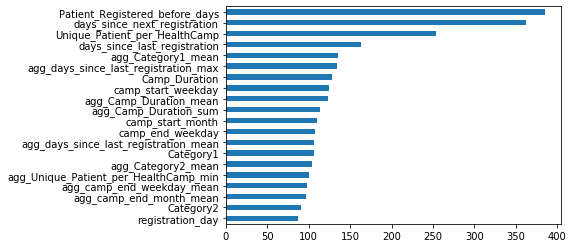

In [55]:
fi = pd.Series(index = features, data = clf.feature_importances_)
fi.sort_values(ascending=False)[0:20][::-1].plot(kind = 'barh')

In [56]:
preds = 0
for seed_val in [1, 3, 10, 15, 20, 33, 333, 1997, 2020, 2021]:
    print(seed_val)
    m = LGBMClassifier(n_estimators=450, learning_rate=0.03,
                       random_state=seed_val, colsample_bytree=0.6, reg_alpha=2, reg_lambda=2)
    m.fit(train[features], train[TARGET_COL])
    predict = m.predict_proba(test[features])[:, 1]
    preds += predict
preds = preds/10


1
3
10
15
20
33
333
1997
2020
2021


In [57]:
sub = pd.DataFrame({"Patient_ID":test.Patient_ID.values})
sub["Health_Camp_ID"] = test.Health_Camp_ID.values
sub["Outcome"] =  preds
sub.to_csv("soln.csv", index=False)

## Alternative - 1

In [ ]:
def create_feature_map(features):
    fmap = open('./xgb_out/xgb.fmap', 'w')
    for i, feat in enumerate(features):
        fmap.write('{0}\t{1}\tq\n'.format(i,feat))
    fmap.close()

In [ ]:
def XGB(train_X, train_y, test_X, test_y=None, feature_names=None, extra_X=None, seed_val=0, num_rounds=500):
    params = {}
    params["objective"] = "binary:logistic"
    params['eval_metric'] = 'auc'
    params["eta"] = 0.02
    params["subsample"] = 0.8
    params["min_child_weight"] = 5
    params["colsample_bytree"] = 0.7
    params["max_depth"] = 6
    params["silent"] = 1
    params["seed"] = seed_val

    plst = list(params.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=250)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    if feature_names is not None:
        create_feature_map(feature_names)
        model.dump_model('./xgb_out/xgbmodel.txt', './xgb_out/xgb.fmap', with_stats=True)
        importance = model.get_fscore(fmap='./xgb_out/xgb.fmap')
        importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)
        imp_df = pd.DataFrame(importance, columns=['feature','fscore'])
        imp_df['fscore'] = imp_df['fscore'] / imp_df['fscore'].sum()
        imp_df.to_csv("./xgb_out/imp_feat.csv", index=False)

    pred_test_y = model.predict(xgtest)
    loss = 0

    if extra_X is not None:
        xgtest = xgb.DMatrix(extra_X)
        pred_extra_y = model.predict(xgtest)
        return pred_test_y, pred_extra_y, loss

    if test_y is not None:
        loss = metrics.roc_auc_score(test_y, pred_test_y)
        print(loss)
        return pred_test_y, loss
    else:
        return pred_test_y,loss

In [ ]:
print("Final Model..")
preds = 0
for seed_val, num_rounds in [[0,250], [2500,500], [5000, 750]]:
    print(seed_val, num_rounds)
    temp_preds, loss = XGB(train_X, train_y, test_X, feature_names=xcols, seed_val=seed_val, num_rounds=num_rounds)
    preds += temp_preds
preds = preds/3.

## Alterative 2

In [ ]:
def create_folds(X_train, y_train, n_folds):
    
    # Create cv split
    kfolds = StratifiedKFold(n_splits = n_folds, shuffle = True, random_state = 0)
    train_indices = []
    validation_indices = []
    for train_index, validation_index in kfolds.split(X_train, y_train):
        train_indices.append(train_index)
        validation_indices.append(validation_index)
        
    return train_indices, validation_indices

In [ ]:
train_indices, validation_indices = create_folds(X_train, y_train, 5)

In [ ]:
xgb_param= {'objective': 'binary:logistic', 
            'eta': 0.02 , 
            'eval_metric' : 'auc',
            'subsample': 0.8 , 'min_child_weight': 5, 'max_depth': 6 , 'colsample_bytree': 0.7, 'silent':1,'seed': 0}

lgb_param={'reg_lambda': 0.1,
 'reg_alpha': 0.3,
 'num_leaves': 1400,
 'min_split_gain': 0.001,
 'min_data_in_leaf': 60,
 'min_child_weight': 0.001,
 'max_depth': 40,
 'learning_rate': 0.3944206059437656,
 'feature_fraction': 0.5,
 'bagging_frequency': 1,
 'bagging_fraction': 0.8}


xgb_base=xgb.XGBClassifier()
xgb_tuned=xgb.XGBClassifier(**xgb_param)
lgb_base=lgb.LGBMClassifier()
lgb_tuned=lgb.LGBMClassifier(**lgb_param)


models2=[xgb_base,xgb_tuned,lgb_base,lgb_tuned]
metric2=[]
metric_kfold=[]

for model in models2:
            print("Training {}".format(str(model).split('(')[0]))
            predictions = np.zeros(X_train.shape[0], dtype = np.float64)
            for i in range(0, 5): 
                model.fit(X_train.iloc[train_indices[i]], y_train[train_indices[i]])           
                predictions[validation_indices[i]] = [x[1] for x in model.predict_proba(X_train.iloc[validation_indices[i]])]
                m=round(roc_auc_score(y_train[validation_indices[i]], predictions[validation_indices[i]]), 4)
                metric_kfold.append(m)
            metric2.append(np.mean(metric_kfold))
            metric_kfold=[]

ensemble_1=pd.DataFrame({'names':['XGBoost (Base)','XGBoost (Tuned)','LGBM (Base)', 'LGBM (Tuned)'],
                       'ROC':metric2})

ensemble_1=ensemble_1.sort_values(by='ROC',ascending=False).reset_index(drop=True)

ensemble_1

preds = 0

for seed_val, num_rounds in [[0,200], [2016,250], [1323, 225]]:
    xgb_param= {'objective': 'binary:logistic', 
            'eta': 0.02 , 
            'eval_metric' : 'auc',
            'subsample': 0.8 , 'min_child_weight': 5, 'max_depth': 6 , 'colsample_bytree': 0.7, 'silent':1,'seed': seed_val}

    xgtest = xgb.DMatrix(X_test)
    xgtrain = xgb.DMatrix(X_train, label=y_train)
    
    model = xgb.train(xgb_param, xgtrain, num_rounds)
    temp_preds = model.predict(xgtest)
    preds += temp_preds

preds=preds/3

xgb.plot_importance(xgb_tuned)